#### Group Memebers: Antonio Caporossi, Austin Ressler, Aiden Colberg, Ayden Dillon, Lucas Chough

In [ ]:
# Import necessary libraries
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Step 1: Mount Google Drive to access the image file
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Original Image Dimensions: (650, 1350, 3)


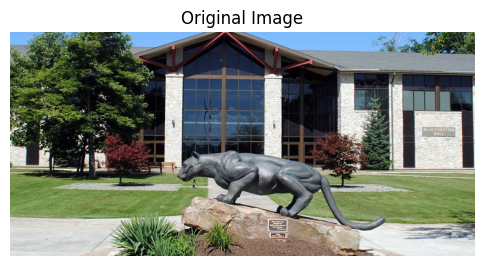

In [ ]:
# Step 2: Set the image path and read the image
image_path = '/content/drive/My Drive/DataSets/Panther.jpg'
image = plt.imread(image_path)

# Display image details
print(f"Original Image Dimensions: {image.shape}")

# Plot the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [ ]:
# Step 3: Preprocess the image for K-means clustering
# Reshape the image into a 2D array (pixels x color channels)
pixels = image.reshape(-1, 3)  # -1 automatically calculates the number of pixels

# Normalize pixel values for better performance
pixels = pixels / 255.0

In [ ]:
# Step 4: Define a function for K-means clustering and image compression
def compress_image(pixels, num_clusters):

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pixels)

    # Replace pixel values with their nearest cluster center
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]

    # Rescale the pixels back to original range (0-255)
    compressed_pixels = (compressed_pixels * 255).astype(np.uint8)

    return compressed_pixels.reshape(image.shape)

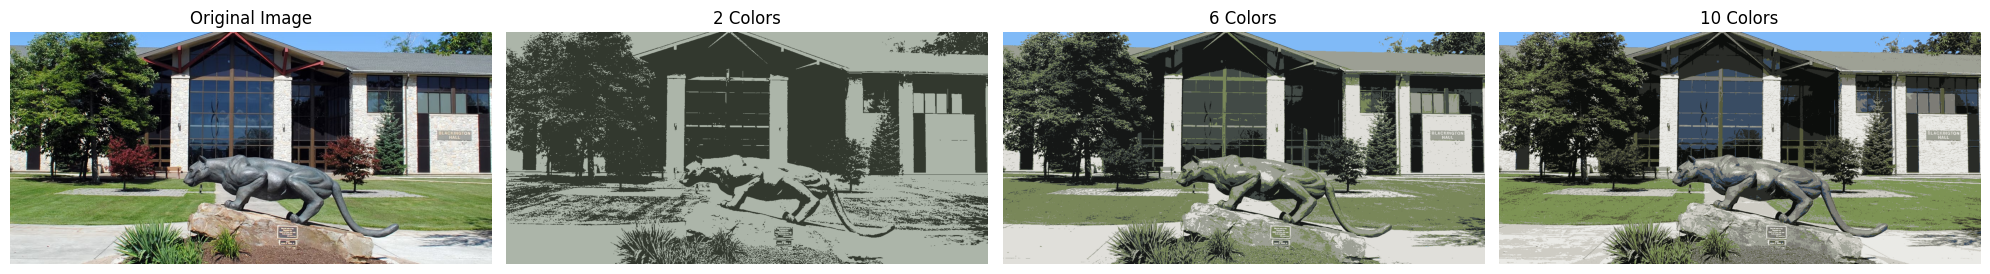

In [ ]:
# Step 5: Compress and visualize the image with 2, 6, and 10 colors
color_options = [2, 6, 10]
fig, axes = plt.subplots(1, len(color_options) + 1, figsize=(20, 16))

# Plot the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Compress and plot for each color option
for idx, num_colors in enumerate(color_options, start=1):
    compressed_image = compress_image(pixels, num_colors)
    axes[idx].imshow(compressed_image)
    axes[idx].set_title(f"{num_colors} Colors")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()


#**Analisis:**
*Images with more colors compress well with little distortion because they retain a greater variety of color information.*

####**Higher Number of Clusters (Colors):**

When using K-means clustering, each pixel is approximated to the nearest cluster center (color). With more clusters, the algorithm can represent the image's original color diversity more accurately.

####**Reduced Quantization Error:**

 Quantization error occurs when pixel values are replaced with approximate values from cluster centers. More clusters mean smaller differences between the original and compressed colors, reducing visible distortion.

####**Perception of Detail:**

Human vision is sensitive to significant color changes but less so to minor variations. A higher number of colors preserves these subtle differences, maintaining the image's natural look.

####**Conclusion:**

In contrast, fewer clusters reduce the color palette drastically, leading to noticeable banding or loss of detail, especially in gradients or regions with diverse colors.